In [221]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import linear_model
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.metrics import mean_absolute_error

%matplotlib inline
sns.set_style("darkgrid")
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
np.random.seed(5)

In [222]:
# Load data
data = pd.read_csv('modelling_dataset.csv')

In [223]:
# Standardise and create train and test sets
X = data[['tweets_mean_comp', 'tweets_prop_neg', 'tweets_num_total', 'tweets_num_neg',
       'headlines_mean_comp', 'headlines_prop_neg', 'headlines_num_total', 'headlines_num_neg']]

standardised_X = preprocessing.scale(X)
y_sat = data['mor_sat'].values

X_train = standardised_X[:21]
y_sat_train = y_sat[:21]

X_test = standardised_X[-1].reshape(1, -1)
y_sat_test = y_sat[-1]

In [228]:
# fit model
model = linear_model.LinearRegression()
model = sat_model.fit(X_train, y_sat_train)

pred_train = sat_model.predict(X_train)
pred_test = sat_model.predict(X_test)

# Evaluation on training set
mae = mean_absolute_error(y_sat_train, pred_train)
r2 = model.score(X_train, y_sat_train)
print(f'Mean absolute error on the training set was {round(mae, 2)} percentage points')
print(f'R-squared on the training set was {round(r2, 2)}')

Mean absolute error on the training set was 5.13 percentage points
R-squared on the training set was 0.57


In [229]:
# Combine actual and predicted values for data visualisation
pred_all = np.concatenate((sat_pred_train, sat_pred_test))

pred_data = pd.DataFrame({'date': data['date'], 'Actual': data['mor_sat'], 'Predicted': pred_all})
pred_data.set_index('date', inplace=True)
pred_data = pred_data.unstack().reset_index()
pred_data.columns = ['type', 'Date', 'Satisfaction Rating (%)']

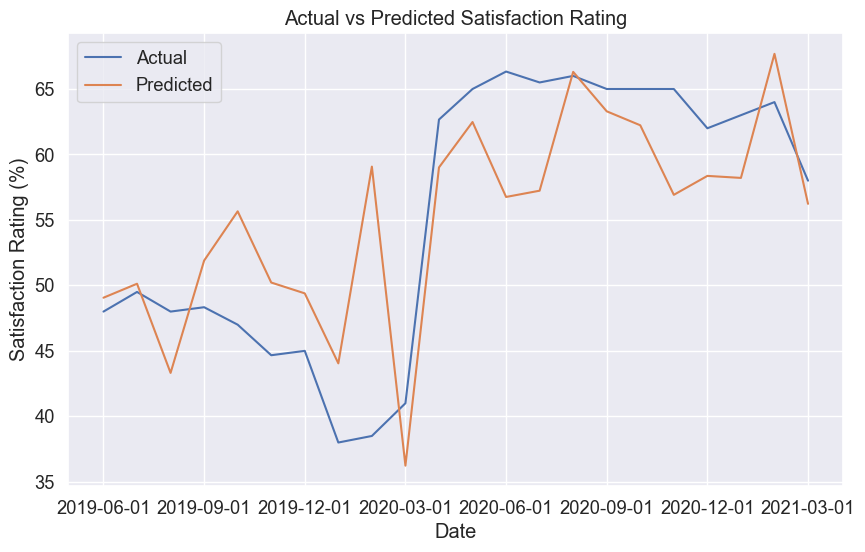

In [230]:
# Create visualisation of actual vs predicted satisfaction ratings
fig, line = plt.subplots(figsize = (10,6), dpi = 100)
line = sns.lineplot(data=pred_data, x='Date', y='Satisfaction Rating (%)', hue='type')
line.set_title('Actual vs Predicted Satisfaction Rating'); 
line.legend(title="");
sns.set(font_scale=1.2);
line.xaxis.set_major_locator(ticker.MultipleLocator(3))